# Algoritmo K-Means
#### K-Means es un algoritmo de clustering no supervisado que agrupa datos en K grupos según la cercanía a centroides.
#### Es rápido y eficiente, pero requiere conocer el número de clusters (K) y no detecta outliers.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Se cargan los datos

In [6]:
df = pd.read_csv('AllData1.csv')
print(df.head())

   direccion_viento  humedad_relativa  radiacion_solar  temp_aire  vel_viento  \
0             206.5              60.0             31.0       18.6        10.2   
1             194.1              55.0             30.3       20.3        10.2   
2             186.4              47.2             25.1       20.0         9.0   
3             170.5              54.8             15.8       16.0         9.2   
4             156.8              47.3             10.6       14.7         8.5   

   mp10_val  
0   22.5369  
1   39.0410  
2   43.8277  
3   34.0361  
4   32.6348  


In [7]:
# Revisión general del dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   direccion_viento  69 non-null     float64
 1   humedad_relativa  69 non-null     float64
 2   radiacion_solar   69 non-null     float64
 3   temp_aire         69 non-null     float64
 4   vel_viento        69 non-null     float64
 5   mp10_val          69 non-null     float64
dtypes: float64(6)
memory usage: 3.4 KB
None
       direccion_viento  humedad_relativa  radiacion_solar  temp_aire  \
count         69.000000         69.000000        69.000000  69.000000   
mean         185.181159         43.501449        22.375362  16.723188   
std           16.524165          9.161613         7.744076   2.591680   
min          142.300000         14.000000        10.600000  11.100000   
25%          173.500000         37.700000        14.200000  14.600000   
50%          187.800000         43.3000

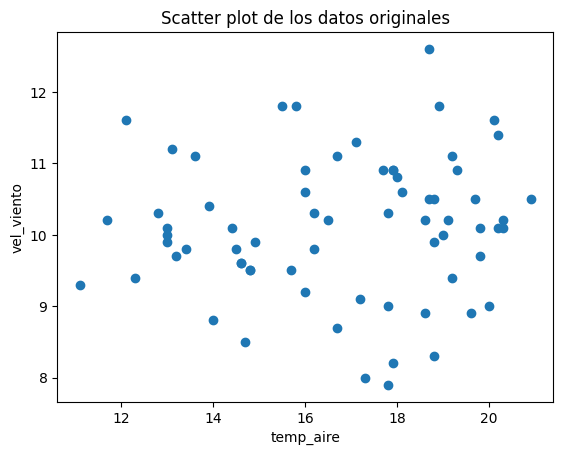

In [9]:
# Visualización previa
plt.scatter(df['temp_aire'], df['vel_viento'])
plt.xlabel('temp_aire')
plt.ylabel('vel_viento')
plt.title('Scatter plot de los datos originales')
plt.show()

In [11]:
# Escalar los datos para mejorar la precisión del clustering
scaler = StandardScaler()
X = scaler.fit_transform(df[['temp_aire', 'vel_viento']])

In [13]:
# Aplicar K-Means con 3 clusters (puedes ajustar este número según los datos)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters

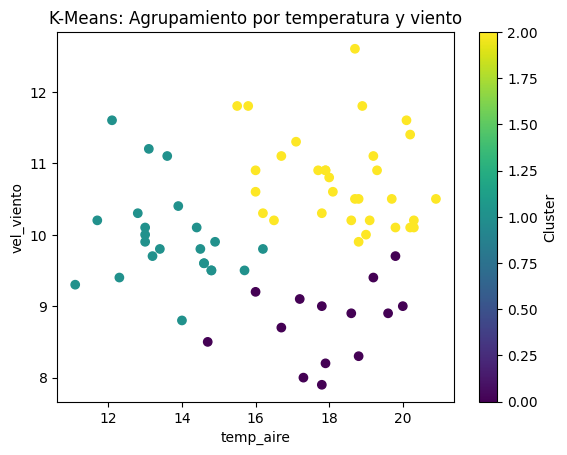

In [14]:
# Visualización del resultado del clustering
plt.scatter(df['temp_aire'], df['vel_viento'], c=df['cluster'], cmap='viridis')
plt.xlabel('temp_aire')
plt.ylabel('vel_viento')
plt.title('K-Means: Agrupamiento por temperatura y viento')
plt.colorbar(label='Cluster')
plt.show()

### Interpretación:
- Cada color representa un cluster detectado por K-Means.
- A diferencia de DBSCAN, todos los puntos son asignados a un cluster.
- No se detectan outliers automáticamente.